In [36]:
import numpy as np
import pandas as pd
import sys,os
sys.path.append(sys.path[0] + '/..')


import matplotlib.pyplot as plt
import matplotlib



from imp import reload
import platereaderclass as prc; reload(prc);
import plates_EstimateMSP as eMSP; reload(eMSP);

In [37]:
basedir = '/home/lukas/projects/antibiotics/experiments/200129_AllData/'

design_assignment_andy = {  'andy_WT.xlsx':         [0, 1, 2], 
                            'andy_TEM1.xlsx':       [0, 0, 1, 1, 2, 2], 
                            'andy_E104KG238S.xlsx': [0, 0, 1, 1, 2, 2],
                            'andy_G238S.xlsx':      [0, 0, 1, 1, 2, 2],
                            'andy_Triple.xlsx':     [0, 1, 2]}

design_assignment_philip = {'philip_G238S.xlsx':    [0, 0, 0, 0, 0, 0, 0, 0],
                            'philip_Triple.xlsx':   [0, 0, 1, 1, 1, 1, 0, 0]}


def make_argparse_options(filename,design_assignment):
    return ['-q','-i',basedir + filename.split('_')[0] + '/data/' + filename,'-M','NfuncB','BfuncN', '-D'] + [str(i) for i in design_assignment]

def AddDF(df1 = None,df2 = None):
    if df1 is None:    return df2
    elif df2 is None:  return df1
    else:              return pd.concat([df1,df2],ignore_index = True)

def split_allele_name_andy(df):
    def split_iptg(allele):
        if allele[-4:].upper() == 'IPTG': return [allele[:-5],allele[-5:]]
        else:                             return [allele,'+IPTG']
    data = [x.strip('andy') for x in df['Title'].values]
    data = np.array([['andy',split_iptg(x.split('_')[0])[0],split_iptg(x.split('_')[0])[1],x.split('_')[1]] for x in data])
    df['exp'] = 'andy'
    df['Allele'] = data[:,1]
    df['ExprLevel'] = data[:,2]
    df['Repetition'] = data[:,3]
    return df

def split_allele_name_philip(df):
    data = np.array([x.split('_') for x in df['Title'].values])
    df['exp'] = 'philip'
    df['Allele'] = data[:,0]
    df['ExprLevel'] = data[:,1]
    df['Repetition'] = data[:,2]
    return df

In [38]:
results_andy = None
for datafile in design_assignment_andy.keys():
    curres = eMSP.EstimateMSP(params = make_argparse_options(datafile,design_assignment_andy[datafile]))
    results_andy = AddDF(results_andy,curres)

results_philip = None
for datafile in design_assignment_philip.keys():
    curres = eMSP.EstimateMSP(params = make_argparse_options(datafile,design_assignment_philip[datafile]))
    results_philip = AddDF(results_philip,curres)
    
results = AddDF(split_allele_name_andy(results_andy),split_allele_name_philip(results_philip))
results.drop(columns = ['Title','Filename'],inplace = True)

results

,NB_sMIC,NB_sMIC_stddev,NB_tau,NB_tau_stddev,NB_R2,BN_sMIC,BN_sMIC_stddev,BN_tau,BN_tau_stddev,BN_R2,exp,Allele,ExprLevel,Repetition
0,0.057485,0.107967,1.721031e-07,1.509565e-07,0.565178,0.103859,0.133159,9.726884e-08,8.531728e-08,0.565178,andy,WT,+IPTG,A
1,0.043705,0.064954,2.603217e-07,1.708215e-07,0.699012,0.069469,0.080090,1.819680e-07,1.194063e-07,0.699012,andy,WT,+IPTG,B
2,0.056324,0.078849,1.883684e-07,1.311983e-07,0.673351,0.084102,0.090536,1.268380e-07,8.834245e-08,0.673351,andy,WT,+IPTG,C
3,0.036567,0.023540,3.080493e-07,4.632864e-07,0.306577,0.044654,0.013181,9.444087e-08,1.420330e-07,0.306577,andy,TEM1,-IPTG,A
4,0.034087,0.017761,2.486184e-07,3.243498e-07,0.370096,0.040912,0.010604,9.201257e-08,1.200404e-07,0.370096,andy,TEM1,+IPTG,A
5,0.035006,0.043180,2.844460e-07,1.521564e-07,0.777520,0.050296,0.051579,2.211624e-07,1.183046e-07,0.777520,andy,TEM1,-IPTG,B
6,0.037940,0.043730,2.827461e-07,1.435045e-07,0.795168,0.052398,0.051129,2.248307e-07,1.141103e-07,0.795168,andy,TEM1,+IPTG,B
7,0.026702,0.024979,3.410337e-07,1.948223e-07,0.753949,0.035003,0.026807,2.571221e-07,1.468861e-07,0.753949,andy,TEM1,-IPTG,C
8,0.036541,0.029496,3.137430e-07,1.347172e-07,0.844328,0.044504,0.031822,2.649021e-07,1.137456e-07,0.844328,andy,TEM1,+IPTG,C
9,0.516232,0.369723,1.047349e-06,4.655603e-07,0.835009,0.621101,0.389914,8.745455e-07,3.887470e-07,0.835009,andy,E104KG238S,-IPTG,A


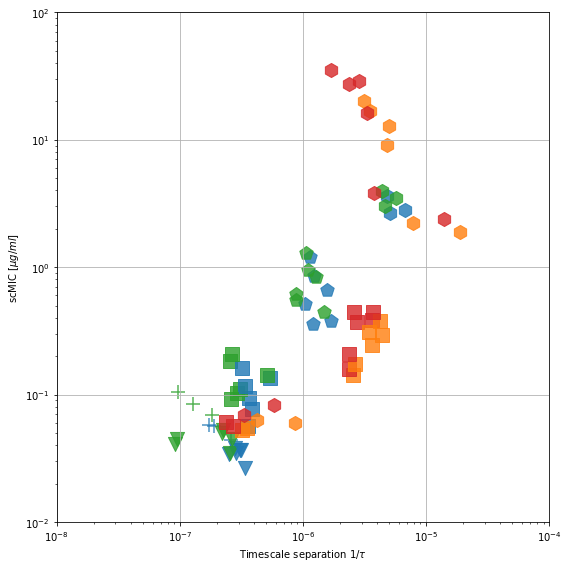

In [63]:
fig,ax = plt.subplots(1,1,figsize = (8,8))

colors1 = {'andy':'TAB:BLUE','philip':'TAB:ORANGE'}
colors2 = {'andy':'TAB:GREEN','philip':'TAB:RED'}
alleles = {'WT':'+','TEM1':'v','G238S':'s','E104KG238S':'p','Triple':'h'}
exprlevel = {'-IPTG':'none','+IPTG':'full','None':'none','Low':'top','Med':'bottom','High':'full'}

for index,experiment in results.iterrows():
    ax.scatter(experiment['NB_tau'],experiment['NB_sMIC'],c = colors1[experiment['exp']], marker = alleles[experiment['Allele']], s = 200,alpha = .8)
    ax.scatter(experiment['BN_tau'],experiment['BN_sMIC'],c = colors2[experiment['exp']], marker = alleles[experiment['Allele']], s = 200,alpha = .8)

    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1e-8,1e-4])
ax.set_ylim([1e-2,1e2])
ax.set_xlabel(r'Timescale separation $1/\tau$')
ax.set_ylabel(r'scMIC $[\mu g/ml]$')
ax.grid()
fig.tight_layout()
fig.savefig('tau_smic.pdf')

In [70]:
experiment_data = prc.PlateReaderData(infiles = [basedir + '/andy/data/andy_G238S.xlsx'])

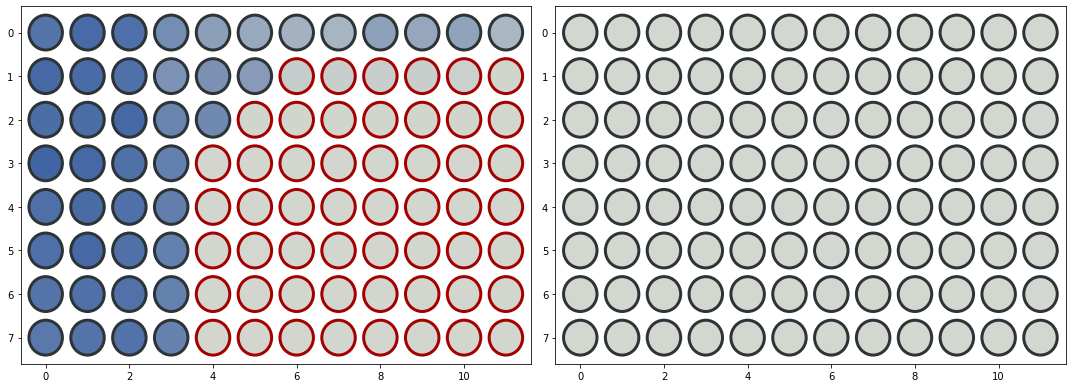

In [96]:
def plot_well(ax,pos,value,thres):
    border_color = '#2e3436'
    if value <= thres:
        border_color = '#a40000'
    blue = [ 65,101,164]
    gray = [211,215,207]
    patch_color = '#{:02X}{:02X}{:02X}'.format(int(blue[0] * value + gray[0] * (1-value)),int(blue[1] * value + gray[1] * (1-value)),int(blue[2] * value + gray[2] * (1-value)))
    circle = matplotlib.patches.Circle(pos,0.4,facecolor = patch_color, edgecolor = border_color, linewidth = 3)
    ax.add_patch(circle)

def rescale(platedata,threshold):
    return (platedata - np.min(platedata))/(np.max(platedata) - np.min(platedata)),(threshold - np.min(platedata))/(np.max(platedata)-np.min(platedata))


platedata,threshold = rescale(experiment_data[3],experiment_data.EstimateGrowthThreshold())

fig,ax = plt.subplots(1,2,figsize = (15,5.5))

for x in range(platedata.shape[0]):
    for y in range(platedata.shape[1]):
        plot_well(ax[0],[y,x],platedata[x,y],threshold)
        plot_well(ax[1],[y,x],0,-1)

ax[0].set_xlim([-.6,11.6])
ax[0].set_ylim([7.6,-.6])
ax[1].set_xlim([-.6,11.6])
ax[1].set_ylim([7.6,-.6])
fig.tight_layout()

fig.savefig('platedata.pdf')
